## OCR Regognition

In [ ]:
%pip install pytesseract

In [ ]:
%pip install matp

INFO: pip is looking at multiple versions of matp to determine which version is compatible with other requirements. This could take a while.


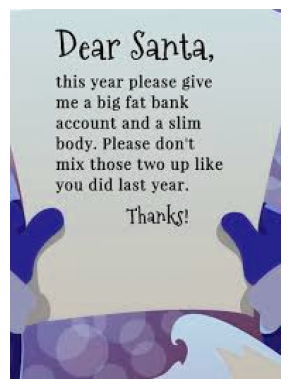

Detected Text:

     

Dear Santa,

this year please give
me a big fat bank
account and a slim
body. Please don't
mix those two up like
you did last year.

‘Thanks!

 

 



In [7]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("images.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

# Convert to grayscale (helps OCR accuracy)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract text using pytesseract
text = pytesseract.image_to_string(gray)

# Print the extracted text
print("Detected Text:\n\n", text)

## Edge Detection

In [8]:
from skimage import io, color, filters
import matplotlib.pyplot as plt

In [9]:
# Load an image in grayscale (edges are clearer in grayscale)
image = io.imread("dog.jpg")

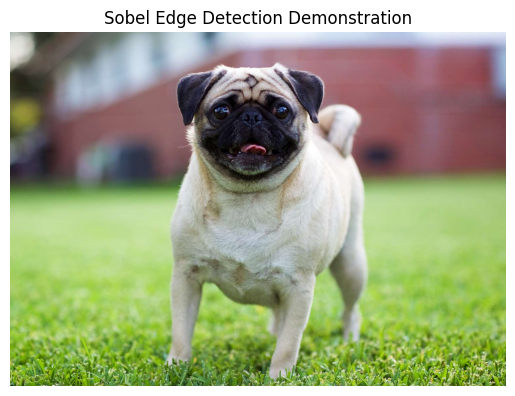

In [10]:
# Display the edges using matplotlib
plt.imshow(image)
plt.title("Sobel Edge Detection Demonstration")
plt.axis('off')
plt.show()

In [11]:
# Check if the image has an alpha channel and remove it if necessary
if image.shape[2] == 4:
    image = image[:, :, :3]  # Keep only the first 3 channels (RGB)

In [12]:
# Apply the Sobel edge detection filter
image_gray = color.rgb2gray(image)
edges = filters.sobel(image_gray)

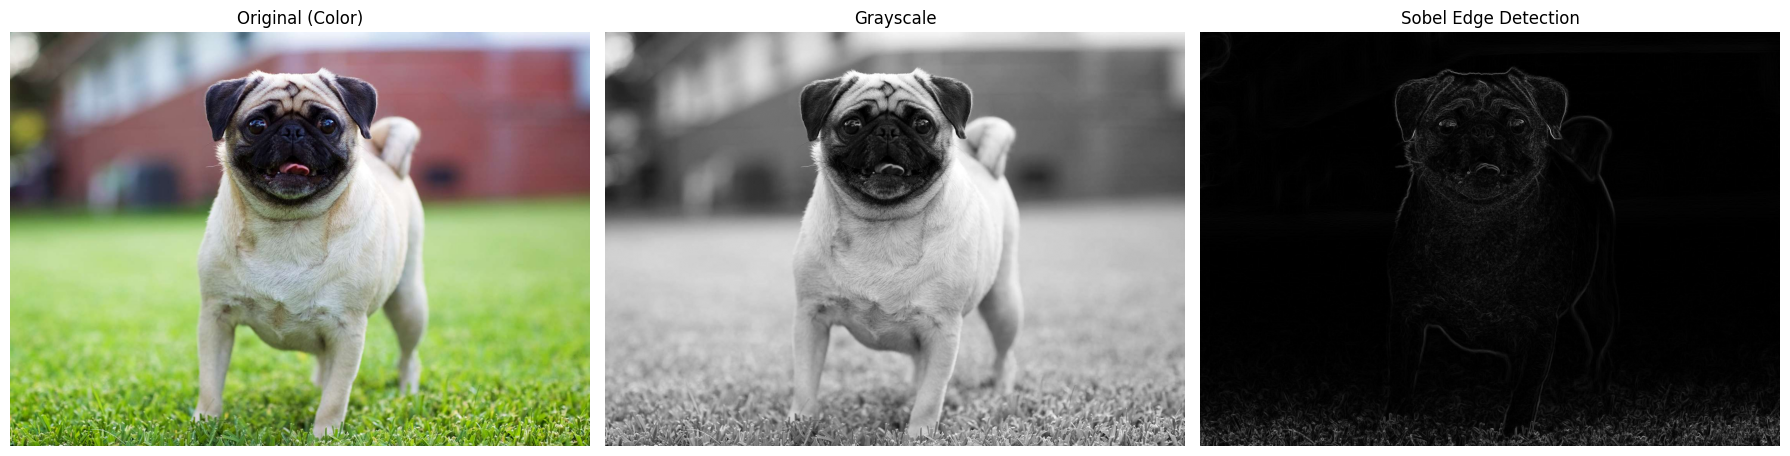

In [13]:
# Display the original and edge-detected images
# Step 4: Display all three stages
plt.figure(figsize=(18, 6))

# Original color image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original (Color)")
plt.axis("off")

# Grayscale image
plt.subplot(1, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

# Edge-detected image
plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

##Image Feature Detection

In [14]:
import torch
import torchvision.transforms as transforms
from torchvision.models import vgg19
from PIL import Image

In [15]:
# Convert image to PIL for torchvision
image_pil = Image.fromarray(image)

In [16]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),     # Resize for model input
    transforms.ToTensor()              # Convert image to tensor format
])
img_tensor = transform(image_pil).unsqueeze(0)  # Add batch dimension


In [17]:
# Load pretrained VGG19 and extract early features
model = vgg19(pretrained=True).features[:8]
model.eval()

with torch.no_grad():
    features = model(img_tensor)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
# Show original + one feature map channel
img_display = img_tensor.squeeze(0).permute(1, 2, 0).numpy()
feature_map = features[0][32].numpy()  # First feature channel

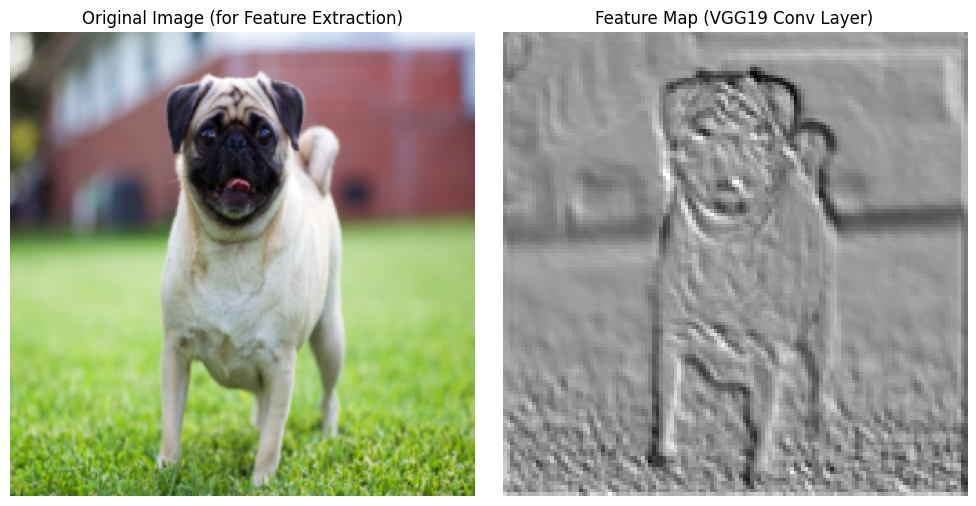

In [19]:
# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_display)
plt.title("Original Image (for Feature Extraction)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(feature_map, cmap='gray')
plt.title("Feature Map (VGG19 Conv Layer)")
plt.axis("off")

plt.tight_layout()
plt.show()

##Pose Detection




In [ ]:
%pip install --upgrade mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled p

In [ ]:
#import cv2 #to read and process images
#import matplotlib.pyplot as plt #to show resultant images
#import mediapipe as mp

# Initializing mediapipe pose class.
#mp_pose = mp.solutions.pose
# Setting up the Pose model for images.
#pose_img = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=1)
# Setting up the Pose model for videos.
#pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5,
#                          min_tracking_confidence=0.5, model_complexity=1)

# Initializing mediapipe drawing class to draw landmarks on specified image.
#mp_drawing = mp.solutions.drawing_utils


In [ ]:
%pip install opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [20]:
import cv2
print(cv2.__version__)

4.11.0


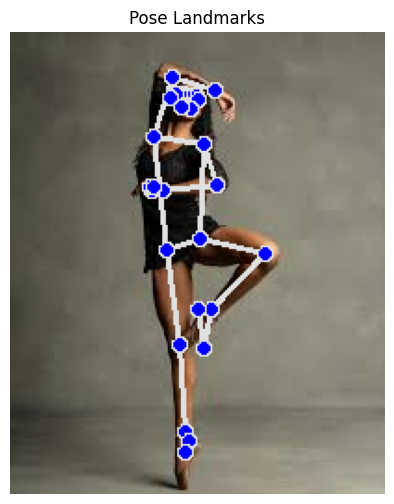

In [21]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Load the image (BGR)
image_bgr = cv2.imread('ballet.jpg')
if image_bgr is None:
    raise ValueError("Image could not be loaded.")

# Convert to RGB (MediaPipe expects RGB)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Ensure it's a proper uint8 array
image_rgb = np.asarray(image_rgb, dtype=np.uint8)

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Run Mediapipe Pose on the image
with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        # Draw the pose annotations on the image
        annotated_image = image_rgb.copy()
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=results.pose_landmarks,
            connections=mp_pose.POSE_CONNECTIONS)

        # Display the result
        plt.figure(figsize=(10, 6))
        plt.imshow(annotated_image)
        plt.axis('off')
        plt.title("Pose Landmarks")
        plt.show()
    else:
        print("No pose landmarks detected.")


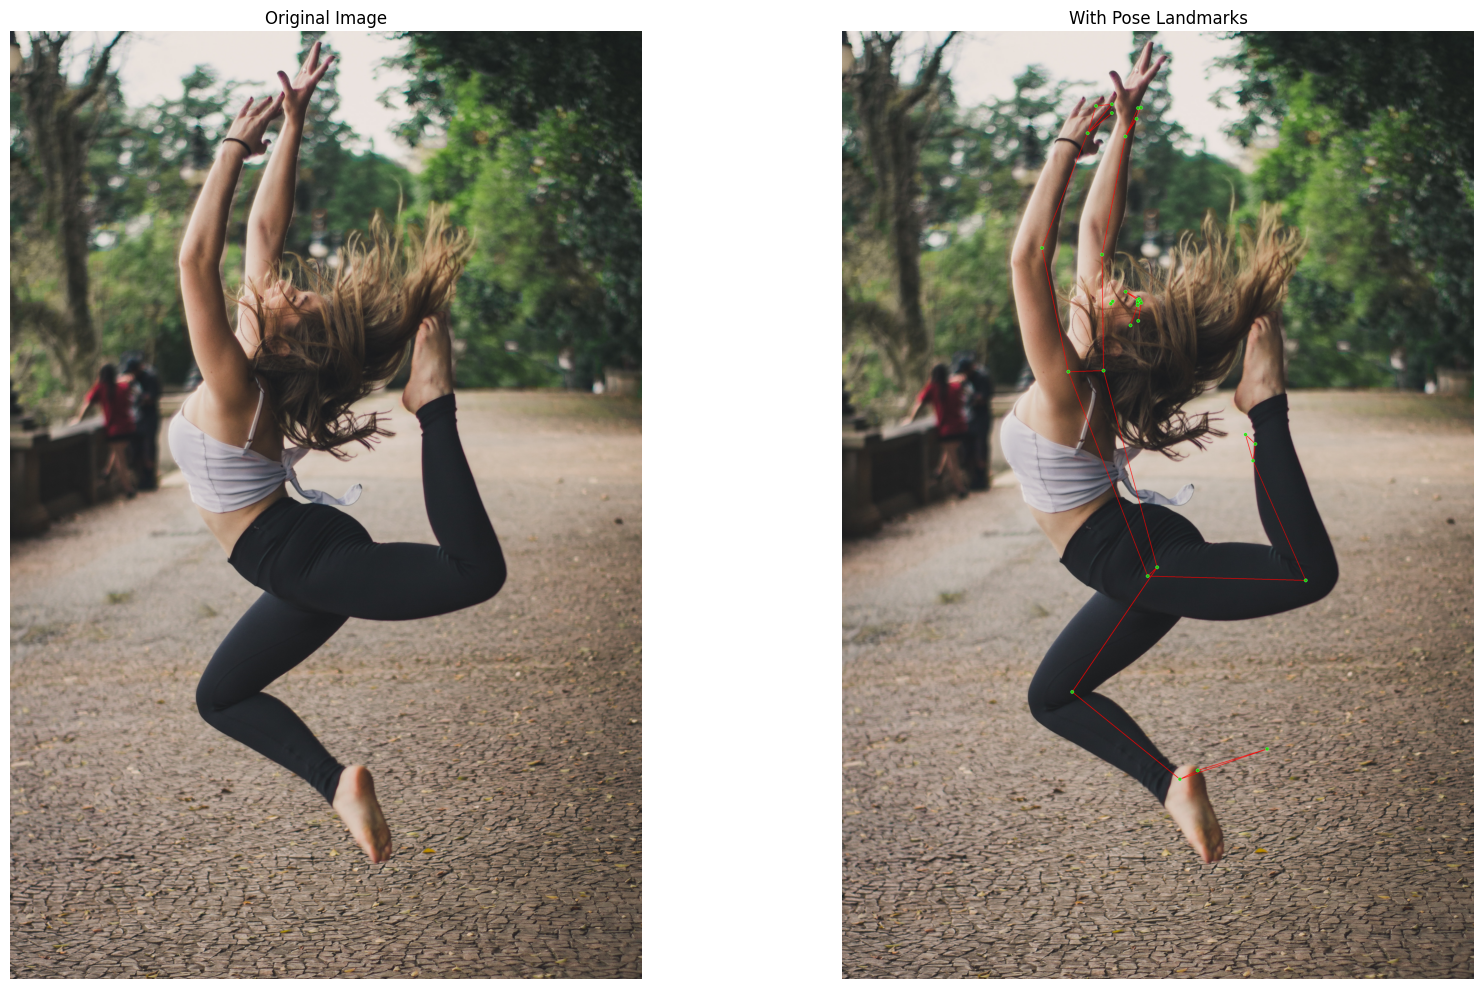

In [ ]:
# @title
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image
image_bgr = cv2.imread('dance_one_pers_4.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Drawing specs for thicker, more colorful landmarks
landmark_style = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=4, circle_radius=5)
connection_style = mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2)

# Process the image
with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        annotated_image = image_rgb.copy()
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=results.pose_landmarks,
            connections=mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=landmark_style,
            connection_drawing_spec=connection_style
        )

        # Show side-by-side comparison
        fig, axes = plt.subplots(1, 2, figsize=(18, 10))
        axes[0].imshow(image_rgb)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(annotated_image)
        axes[1].set_title("With Pose Landmarks")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("No pose landmarks detected.")


## Video Poses

Displaying annotated frame 1


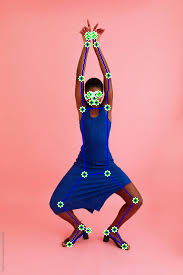

✅ Done! Annotated video saved to: pose_output.mp4


In [26]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow  # ✅ Safe display in Colab
import os

# Load video from file
video_path = 'dance.jpg'  # Replace with your uploaded video
cap = cv2.VideoCapture(video_path)

# Optional: Save output video
save_output = True
output_path = 'pose_output.mp4'

fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

if save_output:
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Initialize MediaPipe
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Drawing styles
landmark_style = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=2)
connection_style = mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=1)

# Process video
with mp_pose.Pose(static_image_mode=False, model_complexity=1, min_detection_confidence=0.5) as pose:
    frame_count = 0
    max_display_frames = 5  # Show only first few frames in Colab

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Run pose detection
        results = pose.process(frame_rgb)

        # Draw landmarks
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image=frame,
                landmark_list=results.pose_landmarks,
                connections=mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=landmark_style,
                connection_drawing_spec=connection_style
            )

        # Save annotated frame
        if save_output:
            out.write(frame)

        # Show only a few sample frames
        if frame_count < max_display_frames:
            print(f"Displaying annotated frame {frame_count + 1}")
            cv2_imshow(frame)

        frame_count += 1

cap.release()
if save_output:
    out.release()

print("✅ Done! Annotated video saved to:", output_path)
